In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/GEOG18 Final Project/Data'

# FDP Australian Department of Agriculture Data
https://www.agriculture.gov.au/search?search_api_fulltext=fdp

In [ ]:
import os

fdp_data_path = data_path+'/fdp'

os.listdir(fdp_data_path)

['fdp-BySize-ByPerformance.csv',
 'fdp-performance-by-size.csv',
 'fdp-state-historical.csv',
 'fdp-regional-historical.csv',
 'fdp-national-historical.csv']

In [ ]:
import pandas as pd

for filename in os.listdir(fdp_data_path):
  if filename.endswith('.csv'):
    filepath = os.path.join(fdp_data_path, filename)
    try:
      df = pd.read_csv(filepath)
      print(f"--- {filename} ---")
      print(df.describe())
      print(df.columns)
      print(df['Variable']) # print out variables
      print("\n")
    except Exception as e:
      print(f"Error reading {filename}: {e}")

--- fdp-BySize-ByPerformance.csv ---
              Year         Value           RSE
count  2277.000000  2.277000e+03   2079.000000
mean   2006.000000  7.521804e+05     70.012987
std       9.523996  1.953852e+06    641.279442
min    1990.000000 -4.743090e+05      0.000000
25%    1998.000000  1.720000e+02      5.000000
50%    2006.000000  3.732100e+04      9.000000
75%    2014.000000  2.770200e+05     22.000000
max    2022.000000  2.011462e+07  17226.000000
Index(['Variable', 'Year', 'Size', 'Value', 'RSE'], dtype='object')
0                  Buildup in trading stocks ($)
1                       Capital appreciation ($)
2                          Capital at 1 July ($)
3                        Change in farm debt ($)
4                               Depreciation ($)
                          ...                   
2272                         Sample Contributing
2273                   Total closing capital ($)
2274                   Total non farm income ($)
2275                    Total o

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fdp_data_path = data_path+'/fdp/'

# load datasets
state_data = pd.read_csv(fdp_data_path+'fdp-state-historical.csv')
national_data = pd.read_csv(fdp_data_path+'fdp-national-historical.csv')

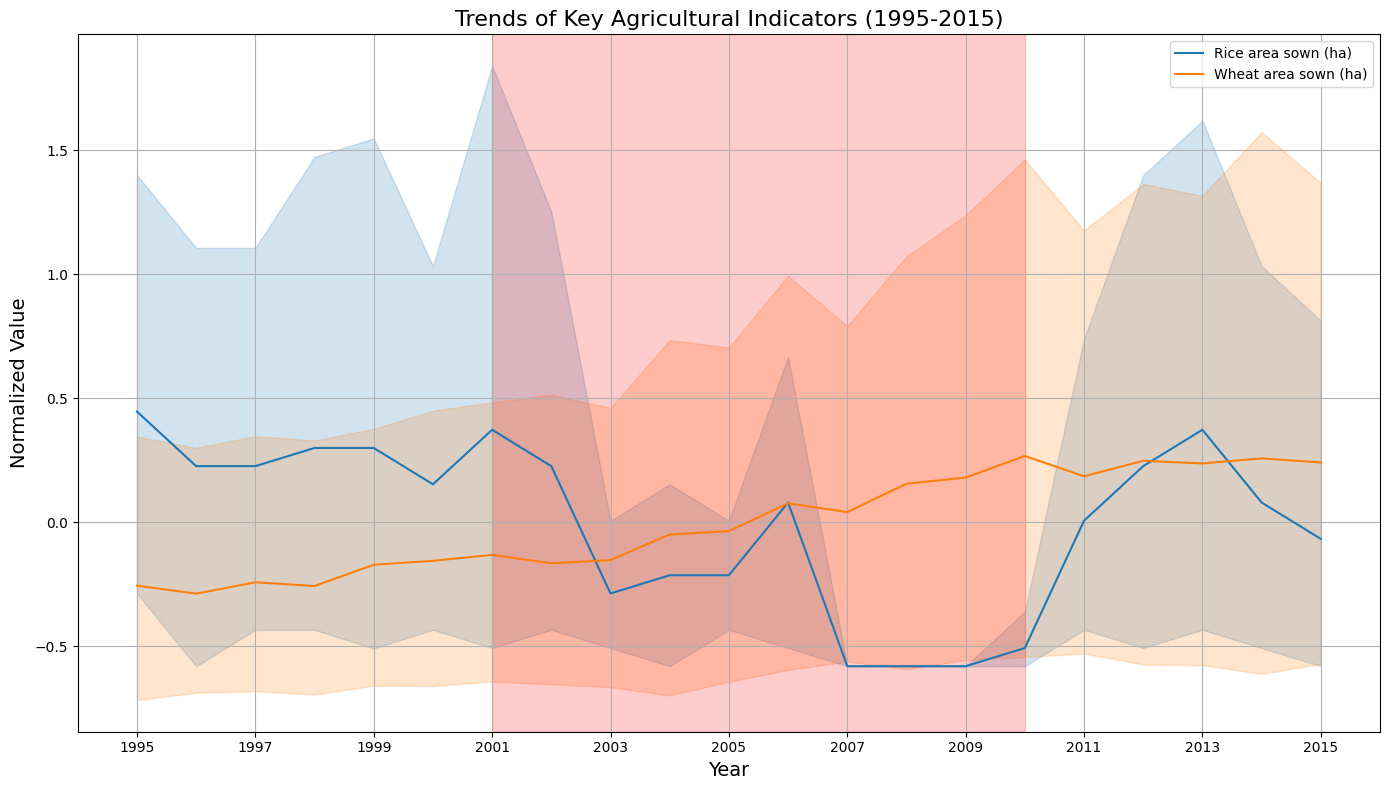

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming 'national_data' DataFrame is already loaded

# Define pre-drought and drought periods
pre_drought = range(1990, 2023)  # Adjust based on your data availability
drought_start = 2001
drought_end = 2010

# Variables to analyze for drought impact
impact_variables = [
    'Rice area sown (ha)', 'Wheat area sown (ha)'
]

# Create a function to filter for these variables
def impact_filter(variable_name):
    return any(var.lower() in variable_name.lower() for var in impact_variables)

# Filter the national data
impact_data = national_data[national_data['Variable'].apply(impact_filter)]

# Filter data for the period from 1995 to 2015
impact_data = impact_data[impact_data['Year'].between(1995, 2015)]

# Normalize the data
scaler = StandardScaler()
impact_data['Normalized Value'] = impact_data.groupby('Variable')['Value'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())

# Create a smoothed line plot for each indicator
plt.figure(figsize=(14, 8))

for variable in impact_data['Variable'].unique():
    variable_data = impact_data[impact_data['Variable'] == variable]

    # Smoothed line plot using seaborn
    sns.lineplot(x='Year', y='Normalized Value', data=variable_data, label=variable)

# Highlight the drought period
plt.axvspan(drought_start, drought_end, color='red', alpha=0.2)

plt.title('Trends of Key Agricultural Indicators (1995-2015)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Normalized Value', fontsize=14)
plt.xticks(ticks=np.arange(1995, 2016, 2), labels=np.arange(1995, 2016, 2))  # Set x-axis ticks and labels
plt.legend(loc='upper right', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('drought_impact_trends.png', dpi=300)
plt.show()